# telecom parte 2

## tratamiento de datos

In [231]:
# leemos nuestro df
import pandas as pd
datos = pd.read_csv('/content/df_plano.csv')

1. Tamaño y forma del DataFrame

In [232]:
# Cantidad de filas y columnas
datos.shape

(7043, 22)

2. Vista rápida de los primeros y últimos registros

In [233]:
# Primeras 5 filas
datos.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


3. Tipos de datos y valores nulos

In [234]:
# Tipos de datos y nulos
datos.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer.gender            7043 non-null   object 
 3   customer.SeniorCitizen     7043 non-null   int64  
 4   customer.Partner           7043 non-null   object 
 5   customer.Dependents        7043 non-null   object 
 6   customer.tenure            7043 non-null   int64  
 7   phone.PhoneService         7043 non-null   object 
 8   phone.MultipleLines        7043 non-null   object 
 9   internet.InternetService   7043 non-null   object 
 10  internet.OnlineSecurity    7043 non-null   object 
 11  internet.OnlineBackup      7043 non-null   object 
 12  internet.DeviceProtection  7043 non-null   object 
 13  internet.TechSupport       7043 non-null   objec

In [235]:
# Cantidad de nulos por columna
datos.isnull().sum()

,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [236]:
# Porcentaje de nulos
(datos.isnull().mean() * 100).round(2)# se utiliza para saber estadisticamente que tanto afecta mi variable

,0
customerID,0.00
Churn,0.00
customer.gender,0.00
customer.SeniorCitizen,0.00
customer.Partner,0.00
customer.Dependents,0.00
customer.tenure,0.00
phone.PhoneService,0.00
phone.MultipleLines,0.00
internet.InternetService,0.00


3 eliminacion de datos

In [237]:
# eliminamos la columnas customerID y Cuentas_Diarias
datos = datos.drop(columns = ['customerID', 'Cuentas_Diarias'])

4. Separar columnas numéricas y categóricas

In [238]:
# saparar columna numericas
numericas_colm = datos.select_dtypes(include = 'number')
numericas_colm.head()

,customer.SeniorCitizen,customer.tenure,account.Charges.Monthly,account.Charges.Total
0,0,9,65.6,593.30
1,0,9,59.9,542.40
2,0,4,73.9,280.85
3,1,13,98.0,1237.85
4,1,3,83.9,267.40


In [239]:
# Columnas categóricas
categoricas_colm = datos.select_dtypes(include = 'object')
categoricas_colm.head()

,Churn,customer.gender,customer.Partner,customer.Dependents,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod
0,No,Female,Yes,Yes,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check
1,No,Male,No,No,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check
2,Yes,Male,No,No,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check
3,Yes,Male,Yes,No,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check
4,Yes,Female,Yes,No,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check


5. estadictica descriptiva

In [240]:
# estadistica descriptiva de variables numericas
numericas_colm.describe().T


,count,mean,std,min,25%,50%,75%,max
customer.SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.00,0.000,0.0000,1.00
customer.tenure,7043.0,32.371149,24.559481,0.00,9.00,29.000,55.0000,72.00
account.Charges.Monthly,7043.0,64.761692,30.090047,18.25,35.50,70.350,89.8500,118.75
account.Charges.Total,7032.0,2283.300441,2266.771362,18.80,401.45,1397.475,3794.7375,8684.80


6. tratamiento de los datos nulos, anteriormente pudimos verificar que tenemos algunos datos nulos en la columna account.Charges.Total, por lo cal vamos a tratar estos datos nulos con la biblioteca Skelaern utilizando la funcion SimpleImputer utilizando la estrategia madiana, ya que estos valores en consultas anteriores no dieron un porcentaje bajo de frecuencia

In [241]:
from sklearn.impute import SimpleImputer

In [242]:
# Imputar datos nulos numéricos (mediana)
imputer_num = SimpleImputer(strategy='median')
datos[numericas_colm.columns] = imputer_num.fit_transform(datos[numericas_colm.columns])

7. Variables explicativas y variable de respuesta

In [243]:
# separamos nuestras variables independientes
X=datos.drop(columns = ['Churn'])
X.head()


,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,Female,0.0,Yes,Yes,9.0,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,Male,0.0,No,No,9.0,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,Male,0.0,No,No,4.0,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,Male,1.0,Yes,No,13.0,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,Female,1.0,Yes,No,3.0,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


In [244]:
y=datos['Churn']
y.head()

,Churn
0,No
1,No
2,Yes
3,Yes
4,Yes


8. validacion de la proporcion de la variable Y


In [245]:
# prporcion de  y
y.value_counts(normalize=True)

,proportion
Churn,
No,0.73463
Yes,0.26537


9. Transformando las variables explicativas

In [246]:
# utilizamos la libreria sklearn
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

In [247]:
columnas = X.columns



In [248]:
# selecionamos las categorias object en x
categ_objct = X.select_dtypes(include=['object']).columns.tolist()
categ_objct

['customer.gender',
 'customer.Partner',
 'customer.Dependents',
 'phone.PhoneService',
 'phone.MultipleLines',
 'internet.InternetService',
 'internet.OnlineSecurity',
 'internet.OnlineBackup',
 'internet.DeviceProtection',
 'internet.TechSupport',
 'internet.StreamingTV',
 'internet.StreamingMovies',
 'account.Contract',
 'account.PaperlessBilling',
 'account.PaymentMethod']

In [249]:
# las tratamos con make column transforme
one_hot= make_column_transformer((OneHotEncoder(drop='if_binary'),
        categ_objct),
        remainder='passthrough',
        sparse_threshold=0,
        force_int_remainder_cols=False)


In [250]:
X = one_hot.fit_transform(X)

In [251]:
# verificamos nuestras columnas convertidas
one_hot.get_feature_names_out(columnas)

array(['onehotencoder__customer.gender_Male',
       'onehotencoder__customer.Partner_Yes',
       'onehotencoder__customer.Dependents_Yes',
       'onehotencoder__phone.PhoneService_Yes',
       'onehotencoder__phone.MultipleLines_No',
       'onehotencoder__phone.MultipleLines_No phone service',
       'onehotencoder__phone.MultipleLines_Yes',
       'onehotencoder__internet.InternetService_DSL',
       'onehotencoder__internet.InternetService_Fiber optic',
       'onehotencoder__internet.InternetService_No',
       'onehotencoder__internet.OnlineSecurity_No',
       'onehotencoder__internet.OnlineSecurity_No internet service',
       'onehotencoder__internet.OnlineSecurity_Yes',
       'onehotencoder__internet.OnlineBackup_No',
       'onehotencoder__internet.OnlineBackup_No internet service',
       'onehotencoder__internet.OnlineBackup_Yes',
       'onehotencoder__internet.DeviceProtection_No',
       'onehotencoder__internet.DeviceProtection_No internet service',
       'onehoten

In [252]:
pd.DataFrame(X, columns=one_hot.get_feature_names_out(columnas))

,onehotencoder__customer.gender_Male,onehotencoder__customer.Partner_Yes,onehotencoder__customer.Dependents_Yes,onehotencoder__phone.PhoneService_Yes,onehotencoder__phone.MultipleLines_No,onehotencoder__phone.MultipleLines_No phone service,onehotencoder__phone.MultipleLines_Yes,onehotencoder__internet.InternetService_DSL,onehotencoder__internet.InternetService_Fiber optic,onehotencoder__internet.InternetService_No,...,onehotencoder__account.Contract_Two year,onehotencoder__account.PaperlessBilling_Yes,onehotencoder__account.PaymentMethod_Bank transfer (automatic),onehotencoder__account.PaymentMethod_Credit card (automatic),onehotencoder__account.PaymentMethod_Electronic check,onehotencoder__account.PaymentMethod_Mailed check,remainder__customer.SeniorCitizen,remainder__customer.tenure,remainder__account.Charges.Monthly,remainder__account.Charges.Total
0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,9.0,65.60,593.30
1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,59.90,542.40
2,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,4.0,73.90,280.85
3,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,13.0,98.00,1237.85
4,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,3.0,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,13.0,55.15,742.90
7039,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,22.0,85.10,1873.70
7040,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,50.30,92.75
7041,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,67.0,67.85,4627.65


10. Transformando la variable respuesta

In [253]:
from sklearn.preprocessing import LabelEncoder

In [254]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y

array([0, 0, 1, ..., 0, 0, 0])

In [255]:
# creamos un df con y y x
df_final = pd.DataFrame(X, columns=one_hot.get_feature_names_out(columnas))
df_final['Churn'] = y
df_final.head()

,onehotencoder__customer.gender_Male,onehotencoder__customer.Partner_Yes,onehotencoder__customer.Dependents_Yes,onehotencoder__phone.PhoneService_Yes,onehotencoder__phone.MultipleLines_No,onehotencoder__phone.MultipleLines_No phone service,onehotencoder__phone.MultipleLines_Yes,onehotencoder__internet.InternetService_DSL,onehotencoder__internet.InternetService_Fiber optic,onehotencoder__internet.InternetService_No,...,onehotencoder__account.PaperlessBilling_Yes,onehotencoder__account.PaymentMethod_Bank transfer (automatic),onehotencoder__account.PaymentMethod_Credit card (automatic),onehotencoder__account.PaymentMethod_Electronic check,onehotencoder__account.PaymentMethod_Mailed check,remainder__customer.SeniorCitizen,remainder__customer.tenure,remainder__account.Charges.Monthly,remainder__account.Charges.Total,Churn
0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,9.0,65.6,593.30,0
1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,9.0,59.9,542.40,0
2,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,4.0,73.9,280.85,1
3,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,13.0,98.0,1237.85,1
4,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,3.0,83.9,267.40,1


11.Análisis de Correlación

In [256]:
# matriz de correlacion
corr_matriz = df_final.corr()


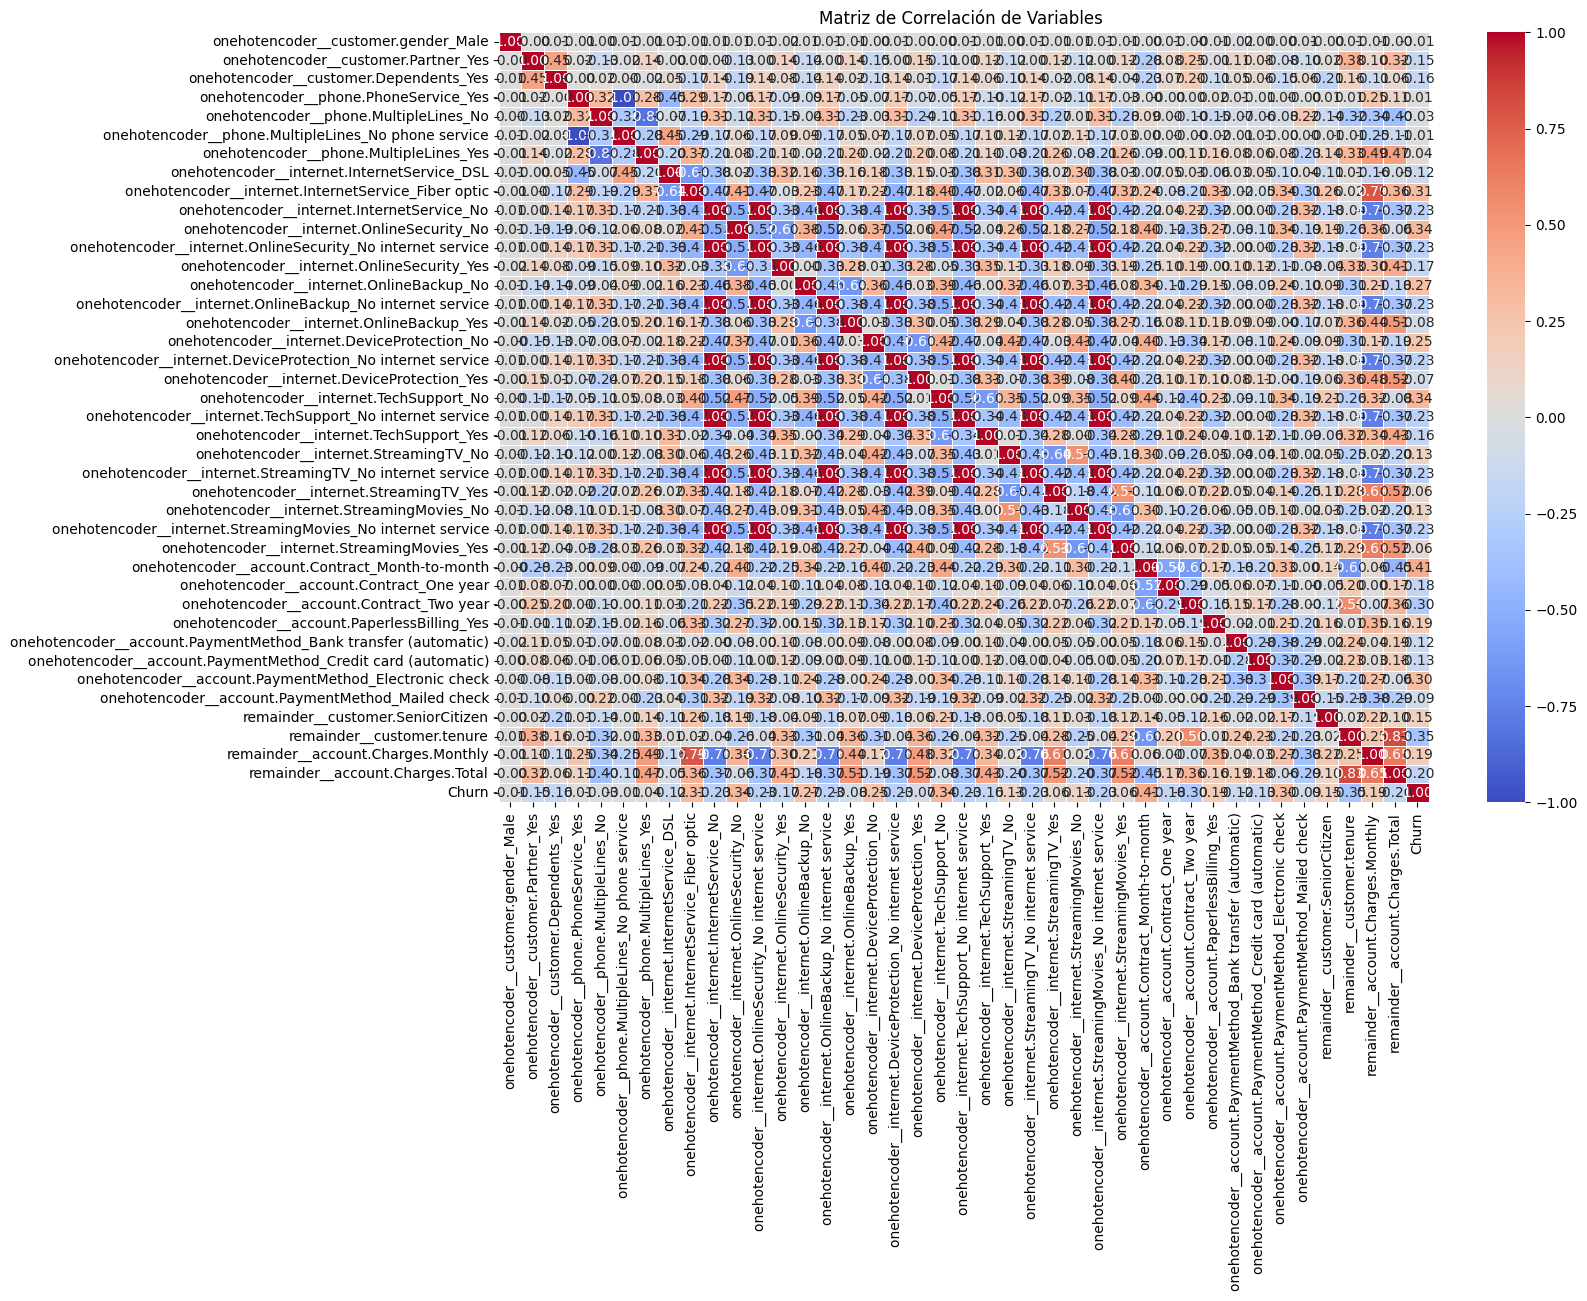


Correlación con Churn:
Churn                                                             1.000000
onehotencoder__account.Contract_Month-to-month                    0.405103
onehotencoder__internet.OnlineSecurity_No                         0.342637
onehotencoder__internet.TechSupport_No                            0.337281
onehotencoder__internet.InternetService_Fiber optic               0.308020
onehotencoder__account.PaymentMethod_Electronic check             0.301919
onehotencoder__internet.OnlineBackup_No                           0.268005
onehotencoder__internet.DeviceProtection_No                       0.252481
remainder__account.Charges.Monthly                                0.193356
onehotencoder__account.PaperlessBilling_Yes                       0.191825
remainder__customer.SeniorCitizen                                 0.150889
onehotencoder__internet.StreamingMovies_No                        0.130845
onehotencoder__internet.StreamingTV_No                            0.128916
o

In [257]:
# visualizamos nuestra matriz con mapa de calor
import seaborn as sns
import matplotlib.pyplot as plt
# Visualizar la matriz de correlación usando un mapa de calor
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matriz, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación de Variables ')
plt.show()

# Mostrar las correlaciones con 'Churn_numeric' específicamente
print("\nCorrelación con Churn:")
print(corr_matriz['Churn'].sort_values(ascending=False))

## Analizis Dirigido

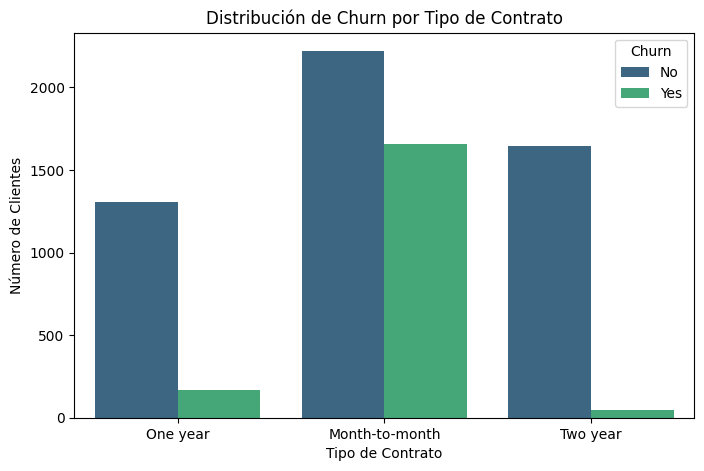

/tmp/ipython-input-349682742.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=datos, x='Churn', y='account.Charges.Total', palette='viridis')


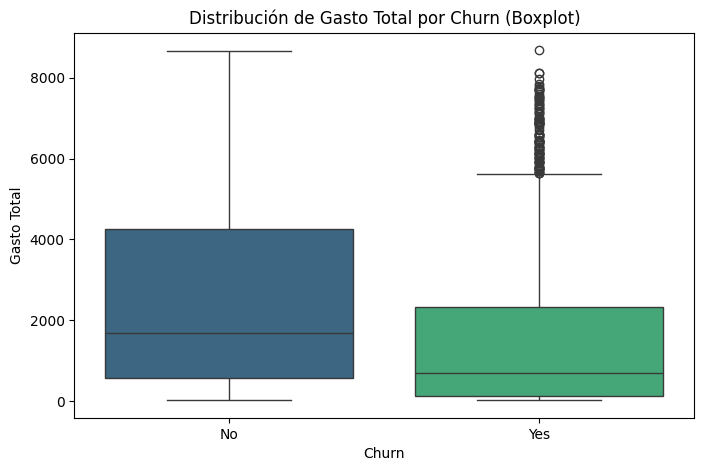

In [258]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizar la relación entre 'Contract' y 'Churn'
plt.figure(figsize=(8, 5))
sns.countplot(data=datos, x='account.Contract', hue='Churn', palette='viridis')
plt.title('Distribución de Churn por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Número de Clientes')
plt.show()

# Visualizar la relación entre 'Charges.Total' y 'Churn' usando un boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(data=datos, x='Churn', y='account.Charges.Total', palette='viridis')
plt.title('Distribución de Gasto Total por Churn (Boxplot)')
plt.xlabel('Churn')
plt.ylabel('Gasto Total')
plt.show()


## ajustando modelos

In [259]:
# divimos los datos entre entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("Forma del conjunto de entrenamiento (X_train):", X_train.shape)
print("Forma del conjunto de prueba (X_test):", X_test.shape)
print("Forma de las etiquetas de entrenamiento (y_train):", y_train.shape)
print("Forma de las etiquetas de prueba (y_test):", y_test.shape)

Forma del conjunto de entrenamiento (X_train): (4930, 40)
Forma del conjunto de prueba (X_test): (2113, 40)
Forma de las etiquetas de entrenamiento (y_train): (4930,)
Forma de las etiquetas de prueba (y_test): (2113,)


utilizamos modelo de referencia - Baseline

In [260]:
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier()
dummy.fit(X_train, y_train)

DummyClassifier()

In [261]:
dummy.score(X_test, y_test)

0.7392333175579744

1. vamos a utilizar el modelo random forest


In [262]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [263]:
# creamos nuestro modelo

modelo = RandomForestClassifier(n_estimators=200, random_state=42)
modelo.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [264]:
y_pred = modelo.predict(X_test)

2.evalumos nuestro modelo

In [265]:
# Evaluar el rendimiento del modelo
print("Evaluación del modelo Random Forest:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Evaluación del modelo Random Forest:
Accuracy: 0.780407004259347

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.89      0.86      1562
           1       0.60      0.46      0.52       551

    accuracy                           0.78      2113
   macro avg       0.71      0.68      0.69      2113
weighted avg       0.77      0.78      0.77      2113


Confusion Matrix:
[[1396  166]
 [ 298  253]]


Conclusiones del modelo Random Forest

Accuracy: 0.78 → el modelo acierta en un 78% de los casos, un desempeño aceptable pero no sobresaliente.

Clases:

Para la clase 0 (no churn), el modelo funciona bien (precisión 0.82, recall 0.89).

Para la clase 1 (sí churn), el desempeño es más bajo (precisión 0.60, recall 0.46).

Problema identificado: el modelo tiende a predecir mejor la clase mayoritaria (0) y tiene dificultades para identificar correctamente la clase minoritaria (1). Esto sugiere un desbalance de clases en el dataset.

In [266]:
# analizamos grafgicamente la matrix de confusion

from sklearn.metrics import ConfusionMatrixDisplay

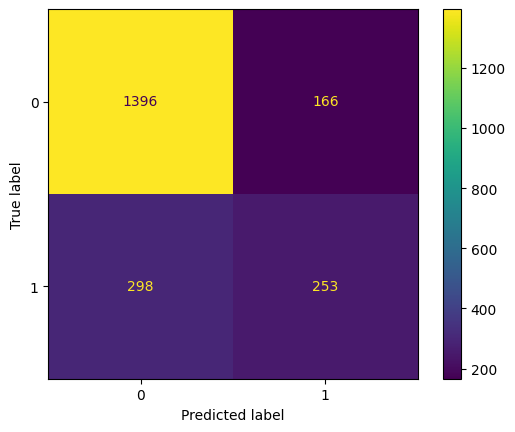

In [267]:
# analizamos grafgicamente la matrix de confusion

from sklearn.metrics import ConfusionMatrixDisplay
visualizacion = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred),display_labels=['0','1'])
visualizacion.plot();

Interpretación de cada celda


TN (True Negatives) = 1396
Clientes que no se fueron y el modelo predijo correctamente que no se irían.

FP (False Positives) = 166
Clientes que el modelo predijo que se irían, pero en realidad no se fueron (falsas alarmas).

FN (False Negatives) = 298
Clientes que sí se fueron, pero el modelo no los detectó (los clasificó como “no churn”).

TP (True Positives) = 253
Clientes que sí se fueron y el modelo los predijo correctamente.

3.**vamos a normalizar nuestros datos para utilizar un modelo KNN**

En estos casos, necesitamos realizar una transformación en los datos para que estén en una misma escala, evitando que el algoritmo sea influenciado incorrectamente por los valores numéricos divergentes entre las variables

In [268]:
from sklearn.preprocessing import MinMaxScaler

In [269]:
normalizacion = MinMaxScaler()
X_train_normalizado = normalizacion.fit_transform(X_train)

In [270]:
# verificamos con un df
pd.DataFrame(X_train_normalizado)

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.083333,0.724190,0.059105
1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.486111,0.568080,0.302014
2,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.263889,0.015461,0.040930
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.305556,0.602993,0.182489
4,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.388889,0.423940,0.203883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4925,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.638889,0.015461,0.102498
4926,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.013889,0.007481,0.000040
4927,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.055556,0.054863,0.009081
4928,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.013889,0.011471,0.000087


4. utilizamos KNN


In [271]:
# importamos nuestro KNeighborsclssifer
from sklearn.neighbors import KNeighborsClassifier

In [272]:
knn = KNeighborsClassifier()
knn.fit(X_train_normalizado, y_train)

KNeighborsClassifier()

In [273]:
# normalizamos nuestro df
X_test_normalizado = normalizacion.transform(X_test)

In [274]:
# realizamos la prediccion
y_pred_knn = knn.predict(X_test_normalizado)


5.evalumos nuestro modelo Knn

In [275]:
# Evaluar el rendimiento del modelo
print("Evaluación del modelo Random Forest:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))

Evaluación del modelo Random Forest:
Accuracy: 0.7529578797917653

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.84      0.83      1562
           1       0.53      0.51      0.52       551

    accuracy                           0.75      2113
   macro avg       0.68      0.67      0.68      2113
weighted avg       0.75      0.75      0.75      2113


Confusion Matrix:
[[1309  253]
 [ 269  282]]


6.escogiendo el modelo

In [276]:
# vamos hallar la exactitud de cada modelo
lista = [('dummy', dummy,X_test),
         ('random', modelo,X_test),
         ('knn', knn,X_test_normalizado)]
for i in lista:
    print(f'la exactitud del modelo {i[0]}:{i[1].score(i[2],y_test)}')


la exactitud del modelo dummy:0.7392333175579744
la exactitud del modelo random:0.780407004259347
la exactitud del modelo knn:0.7529578797917653


En el dataset, Random Forest supera a KNN en precisión y robustez, pero ambos comparten el problema del desbalance de clases. Para mejorar el rendimiento, especialmente en la detección de clientes que hacen churn (clase 1), se debe realizar el desbalance

 7 desbalanceo de variable dependiente

In [277]:
from imblearn.over_sampling import SMOTE

In [278]:
import pandas as pd

In [279]:
# 4. Aplicar Oversampling con SMOTE SOLO al set de entrenamiento
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [280]:
#  Verificar balanceo
print("Antes del Oversampling:", pd.Series(y_train).value_counts())
print("Después del Oversampling:", pd.Series(y_train_res).value_counts())

Antes del Oversampling: 0    3612
1    1318
Name: count, dtype: int64
Después del Oversampling: 1    3612
0    3612
Name: count, dtype: int64


In [281]:
#  entrenamos el modelo con los datos balanceados
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_res, y_train_res)
y_pred = rf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1562
           1       0.59      0.47      0.52       551

    accuracy                           0.78      2113
   macro avg       0.71      0.68      0.69      2113
weighted avg       0.76      0.78      0.77      2113



8. Importancia de las variables


In [283]:
features_names=one_hot.get_feature_names_out(columnas)


In [284]:
importances = rf.feature_importances_

In [286]:
feat_importances = pd.DataFrame({
    'Variable': features_names,
    'Importancia': importances
}).sort_values(by="Importancia", ascending=False)


In [287]:
print(feat_importances.head(15)) # vemso las 15 mas importantes

                                             Variable  Importancia
28     onehotencoder__account.Contract_Month-to-month     0.104296
39                   remainder__account.Charges.Total     0.101441
37                         remainder__customer.tenure     0.094297
38                 remainder__account.Charges.Monthly     0.086031
34  onehotencoder__account.PaymentMethod_Electroni...     0.072120
19             onehotencoder__internet.TechSupport_No     0.052209
10          onehotencoder__internet.OnlineSecurity_No     0.046609
13            onehotencoder__internet.OnlineBackup_No     0.038564
31        onehotencoder__account.PaperlessBilling_Yes     0.027745
16        onehotencoder__internet.DeviceProtection_No     0.024790
30           onehotencoder__account.Contract_Two year     0.024194
1                 onehotencoder__customer.Partner_Yes     0.024036
0                 onehotencoder__customer.gender_Male     0.023115
21            onehotencoder__internet.TechSupport_Yes     0.02

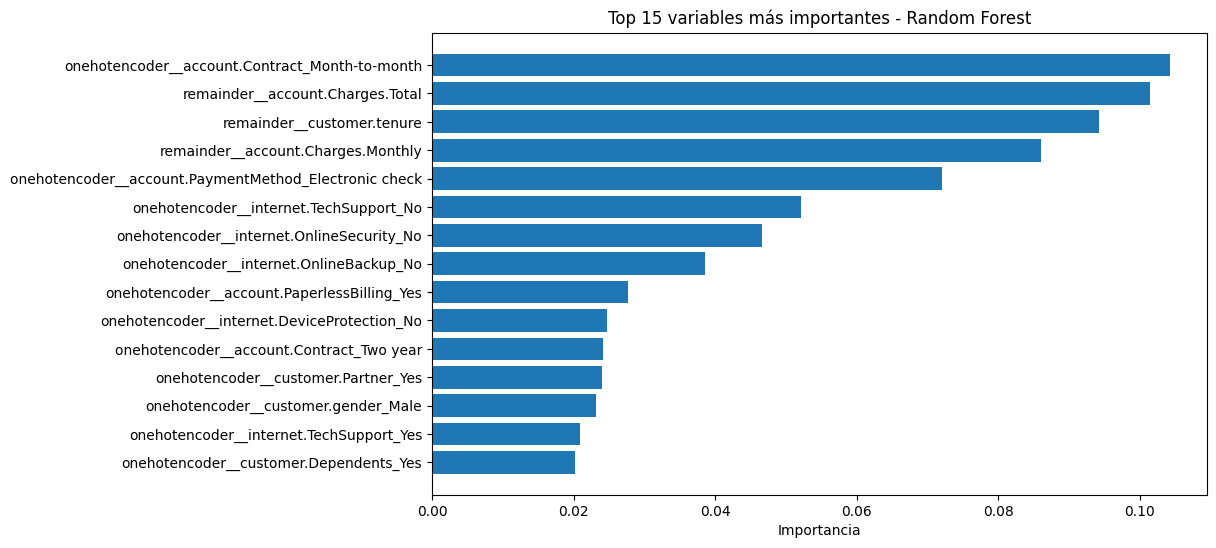

In [288]:
# Grafica
plt.figure(figsize=(10,6))
plt.barh(feat_importances['Variable'][:15], feat_importances['Importancia'][:15])
plt.gca().invert_yaxis()
plt.title("Top 15 variables más importantes - Random Forest")
plt.xlabel("Importancia")
plt.show()

Conclusión sobre la importancia de las variables

El análisis de importancia de variables en el modelo Random Forest muestra que no todas las características tienen el mismo peso en la predicción del churn. Las más influyentes son account.Charges.Total, customer.tenure, y atributos relacionados con los servicios como internet.Service, phone.PhoneService y contract.Type. Esto evidencia que el monto de facturación, la permanencia del cliente y el tipo de servicios contratados son los factores más determinantes en el abandono.

En contraste, algunas variables categóricas presentan una contribución muy baja, lo que indica que su efecto en la predicción es limitado. Estos hallazgos sugieren que el negocio debería concentrar sus estrategias de retención en clientes con altos cargos, baja permanencia o ciertos patrones de servicios, ya que son los que mayor impacto tienen en el riesgo de churn según el modelo.

##**conclusiones**

1. Importancia de las Variables

El análisis de importancia de variables en el modelo Random Forest revela los siguientes factores clave:

**account.Charges.Total** → El monto total de cargos es el factor más influyente; clientes con facturación elevada tienden a cancelar.

**customer.tenure** → La permanencia del cliente es determinante; los clientes con baja permanencia son más propensos a abandonar.

**internet.Service** → El tipo de servicio de internet contratado influye en el churn.

**phone.PhoneService** → La contratación de servicios telefónicos también impacta en la decisión de cancelar.

**contract.Type** → Los clientes con contratos mensuales muestran mayor riesgo de cancelación que aquellos con contratos a más largo plazo.

En contraste, algunas variables categóricas adicionales presentaron menor relevancia en el modelo.

2. **Principales Factores de Cancelación**

Altos cargos facturados → Clientes con costos elevados tienden a cancelar por percepción de precio alto.

Baja permanencia (tenure) → Los clientes nuevos presentan mayor vulnerabilidad al abandono.

Tipo de contrato → Los contratos de corto plazo (mensuales) facilitan la salida del cliente.

Servicios contratados → Determinados servicios de internet o telefonía influyen en la decisión de permanencia.

3. **Estrategias de Retención Propuestas**

Con base en los hallazgos, se recomiendan las siguientes estrategias:

Programas de fidelización: Incentivar a clientes con baja permanencia mediante descuentos iniciales, beneficios por continuidad o puntos de lealtad.

Revisión de planes tarifarios: Ofrecer planes más flexibles o personalizados a clientes con cargos elevados para evitar cancelaciones por motivos de precio.

Incentivos a contratos de largo plazo: Promocionar descuentos o beneficios adicionales para quienes migren de contratos mensuales a anuales.

Mejora de servicios clave: Optimizar la calidad de los servicios de internet y telefonía, dado que su calidad influye directamente en la cancelación.

Monitoreo de clientes en riesgo: Implementar alertas tempranas basadas en modelos predictivos para identificar clientes con mayor probabilidad de cancelar.

